## Imports

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="white")
%matplotlib inline

# White - Whink - Pink - Pired - Red noise classification with Neural Network

## Loading data

In [2]:
wpr = pd.read_table('./noise/clf_noise5.txt', header=None, sep=' ', names=['Hurst', 'Length', 'Colour_idx', 'Colour'])
wpr.head()

,Hurst,Length,Colour_idx,Colour
0,0.551808,100,0,white
1,0.514187,110,0,white
2,0.532242,120,0,white
3,0.642159,130,0,white
4,0.548701,140,0,white


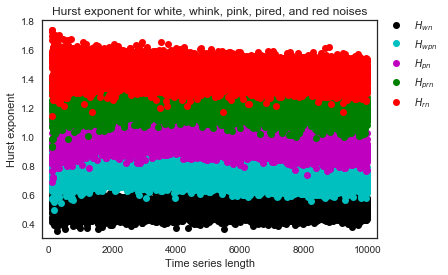

In [3]:
L_plot = wpr['Length']
H_plot = wpr['Hurst']
plt.plot(L_plot[wpr['Colour_idx'] == 0], H_plot[wpr['Colour_idx'] == 0], 'ok', label='$H_{wn}$')
plt.plot(L_plot[wpr['Colour_idx'] == 1], H_plot[wpr['Colour_idx'] == 1], 'oc', label='$H_{wpn}$')
plt.plot(L_plot[wpr['Colour_idx'] == 2], H_plot[wpr['Colour_idx'] == 2], 'om', label='$H_{pn}$')
plt.plot(L_plot[wpr['Colour_idx'] == 3], H_plot[wpr['Colour_idx'] == 3], 'og', label='$H_{prn}$')
plt.plot(L_plot[wpr['Colour_idx'] == 4], H_plot[wpr['Colour_idx'] == 4], 'or', label='$H_{rn}$')
plt.xlim(-200, 10300)
plt.ylim(0.3, 1.8)
plt.title('Hurst exponent for white, whink, pink, pired, and red noises')
plt.xlabel('Time series length')
plt.ylabel('Hurst exponent')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))

## Sklearn imports

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.neural_network import MLPClassifier

## Train and test sets

In [5]:
X = wpr[['Length', 'Hurst']]
y = wpr['Colour_idx']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (37162, 2)
y_train shape: (37162,)
X_test shape: (12388, 2)
y_test shape: (12388,)


## Train and test sets plots

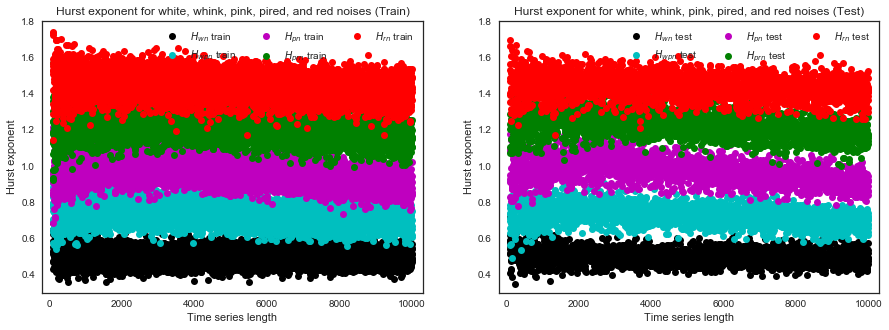

In [6]:
L_train = X_train['Length']
H_train = X_train['Hurst']
L_test = X_test['Length']
H_test = X_test['Hurst']
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(L_train[y_train == 0], H_train[y_train == 0], 'ok', label='$H_{wn}$ train')
plt.plot(L_train[y_train == 1], H_train[y_train == 1], 'oc', label='$H_{wpn}$ train')
plt.plot(L_train[y_train == 2], H_train[y_train == 2], 'om', label='$H_{pn}$ train')
plt.plot(L_train[y_train == 3], H_train[y_train == 3], 'og', label='$H_{prn}$ train')
plt.plot(L_train[y_train == 4], H_train[y_train == 4], 'or', label='$H_{rn}$ train')
plt.xlim(-200, 10300)
plt.ylim(0.3, 1.8)
plt.title('Hurst exponent for white, whink, pink, pired, and red noises (Train)')
plt.xlabel('Time series length')
plt.ylabel('Hurst exponent')
plt.legend(ncol=3, loc=1)
plt.subplot(122)
plt.plot(L_test[y_test == 0], H_test[y_test == 0], 'ok', label='$H_{wn}$ test')
plt.plot(L_test[y_test == 1], H_test[y_test == 1], 'oc', label='$H_{wpn}$ test')
plt.plot(L_test[y_test == 2], H_test[y_test == 2], 'om', label='$H_{pn}$ test')
plt.plot(L_test[y_test == 3], H_test[y_test == 3], 'og', label='$H_{prn}$ test')
plt.plot(L_test[y_test == 4], H_test[y_test == 4], 'or', label='$H_{rn}$ test')
plt.xlim(-200, 10300)
plt.ylim(0.3, 1.8)
plt.title('Hurst exponent for white, whink, pink, pired, and red noises (Test)')
plt.xlabel('Time series length')
plt.ylabel('Hurst exponent')
plt.legend(ncol=3, loc=1)

# Neural Network

## Feature scaling

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Training

In [8]:
grid_param = {'hidden_layer_sizes':((1,), (3,), (10,), (3, 3), (3, 3, 3)), 'solver':['lbfgs', 'sgd', 'adam']}
NN = MLPClassifier(shuffle=True, random_state=0)
grid = GridSearchCV(NN, param_grid=grid_param, scoring='f1_micro', cv=3)
grid.fit(X_train_scaled, y_train)
print('Grid best parameter (F1): {}'.format(grid.best_params_))
print('Grid best score (F1): {}'.format(grid.best_score_))
best_grid = grid.best_estimator_
print(best_grid)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conver

Grid best parameter (F1): {'hidden_layer_sizes': (10,), 'solver': 'lbfgs'}
Grid best score (F1): 0.9701845971691513
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


## Prediction

In [9]:
y_pred = best_grid.predict(X_test_scaled)
# metrics
print('MSE: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('Accuracy: {}'.format(best_grid.score(X_test_scaled, y_test)))
print('Recall: {}'.format(recall_score(y_test, y_pred, average='micro')))
print('Precision: {}'.format(precision_score(y_test, y_pred, average='micro')))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

MSE: 0.17969227094577367
Accuracy: 0.9677106877623507
Recall: 0.9677106877623507
Precision: 0.9677106877623507
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      2474
          1       0.98      0.98      0.98      2480
          2       0.97      0.97      0.97      2467
          3       0.93      0.94      0.94      2491
          4       0.96      0.95      0.95      2476

avg / total       0.97      0.97      0.97     12388

[[2459   15    0    0    0]
 [  22 2433   25    0    0]
 [   0   29 2397   41    0]
 [   0    0   41 2347  103]
 [   0    0    0  124 2352]]


In [10]:
### values of length and hurst
values = scaler.transform([[134, 1.4]])
### predict for input values (returns 0 for white, 1 for whink, 2 for pink, 3 for pired, and 4 for red)
print('Predicted class: {}'.format('white' if best_grid.predict(values) == 0 else('whink' if best_grid.predict(values) == 1 else('pink' if best_grid.predict(values) == 2 else('pired' if best_grid.predict(values) == 3 else 'red')))))
### predict probabilities for input values (returns array, first value for white, second value for pink, and third value for red)
print('Classes probabilities: white -> {:.3f}, whink -> {:.3f}, pink -> {:.3f}, pired -> {:.3f}, red -> {:.3f}'.format(best_grid.predict_proba(values)[0,0], best_grid.predict_proba(values)[0,1], best_grid.predict_proba(values)[0,2], best_grid.predict_proba(values)[0,3], best_grid.predict_proba(values)[0,4]))

Predicted class: red
Classes probabilities: white -> 0.000, whink -> 0.000, pink -> 0.000, pired -> 0.030, red -> 0.970


## Decision Plot

Text(0,0.5,'Hurst exponent')

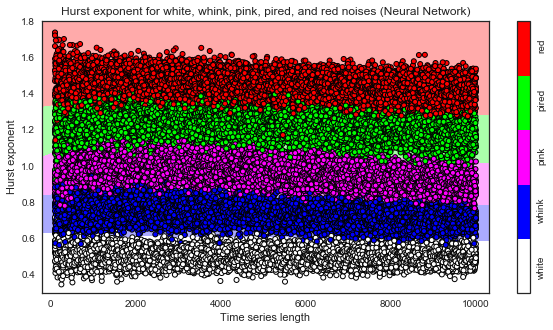

In [11]:
### decision boundary plot
lx = -200
rx = 10300
by = 0.3
ty = 1.8
step = 0.01
lim_new = scaler.transform([[lx, by], [rx, ty]])
xx, yy = np.mgrid[lim_new[0, 0]:lim_new[1, 0]+step:step, lim_new[0, 1]:lim_new[1, 1]+step:step]
pnts = np.c_[xx.ravel(), yy.ravel()]
probs = best_grid.predict(pnts).reshape(xx.shape)
mean_tr = scaler.mean_
std_tr = np.sqrt(scaler.var_)
xx_new = xx * std_tr[0] + mean_tr[0]
yy_new = yy * std_tr[1] + mean_tr[1]
# Create color maps
cmap_light = ListedColormap(['#FFFFFF', '#AAAAFF', '#FFAAFF', '#AAFFAA', '#FFAAAA'])
cmap_bold = ListedColormap(['#FFFFFF', '#0000FF', '#FF00FF', '#00FF00', '#FF0000'])
plt.figure(figsize=(10, 5))
plt.pcolormesh(xx_new, yy_new, probs, cmap=cmap_light)
plt.scatter(X['Length'], X['Hurst'], c=y, cmap=cmap_bold, edgecolor='k', s=25, linewidth=1)
cbar = plt.colorbar()
cbar.set_ticks([0.5, 1.35, 2.1, 2.95, 3.7])
cbar.ax.set_yticklabels(['white', 'whink', 'pink', 'pired', 'red'], rotation=90)
plt.xlim(lx, rx)
plt.ylim(by, ty)
plt.title('Hurst exponent for white, whink, pink, pired, and red noises (Neural Network)')
plt.xlabel('Time series length')
plt.ylabel('Hurst exponent')

## Learning Curve

### Score

In [12]:
grid.best_params_['random_state'] = 0
grid.best_params_['shuffle'] = True
model = MLPClassifier(**grid.best_params_)

In [13]:
train_sizes, train_scores, test_scores = learning_curve(model, X_train_scaled, y_train,
                                                        train_sizes=np.arange(50, 10000, 50), cv=5, shuffle=True)

Text(0,0.5,'Score')

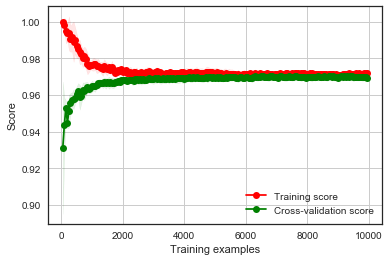

In [14]:
### learning curve plot
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean-test_scores_std, test_scores_mean+test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.legend(loc=4)
plt.xlabel('Training examples')
plt.ylabel('Score')

### RMSE

In [15]:
model = MLPClassifier(**grid.best_params_)
train_errors, val_errors = [], []
for m in np.arange(50, 10000, 50):
    model.fit(X_train_scaled[:m], y_train[:m])
    y_train_predict = model.predict(X_train_scaled[:m])
    y_val_predict = model.predict(X_test_scaled)
    train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
    val_errors.append(mean_squared_error(y_val_predict, y_test))

Text(0,0.5,'RMSE')

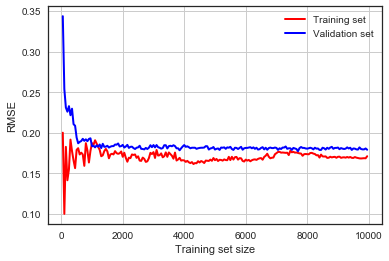

In [16]:
### learning curve plot
plt.grid()
plt.plot(np.arange(50, 10000, 50), np.sqrt(train_errors), 'r-+', linewidth=2, label='Training set')
plt.plot(np.arange(50, 10000, 50), np.sqrt(val_errors), 'b-', linewidth=2, label='Validation set')
plt.legend(loc=1)
plt.xlabel('Training set size')
plt.ylabel('RMSE')